# Predicting Heart Disease using machine learning

## Problem Statement

> Given clinical parameters about a patient, can we predict if the patient has a heart disease or not.

## Data 
This data came from the Cleveland data from the UCI machine learning repository. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# load the data
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [3]:
# are there any missing values ?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
#heart disease Frequency according to sex and compare with the target column
df.sex.value_counts()
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


## Age vs Max Heart rate comparison

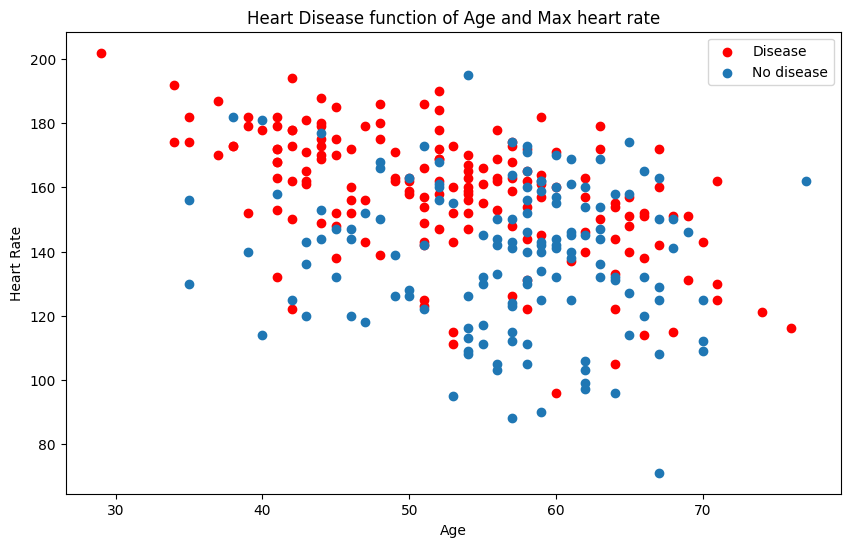

In [5]:
# creating a figure
plt.figure(figsize=(10,6))
#scatter with positive examples
plt.scatter(df.age[df.target ==1],df.thalach[df.target ==1],c = "red")
#scatter with negative examples
plt.scatter(df.age[df.target ==0],df.thalach[df.target ==0])
plt.title("Heart Disease function of Age and Max heart rate")
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.legend(["Disease", "No disease"]);

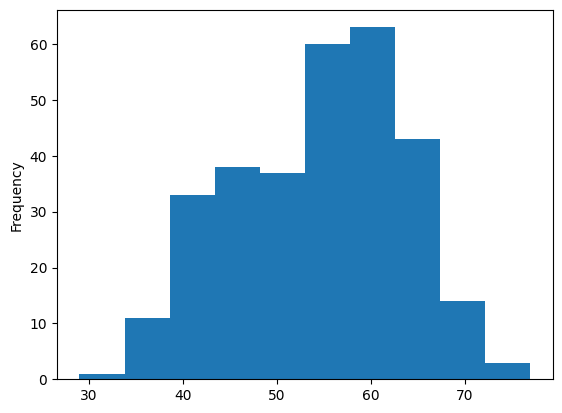

In [6]:
# check the distribution of the age column with a histogram
df.age.plot.hist();

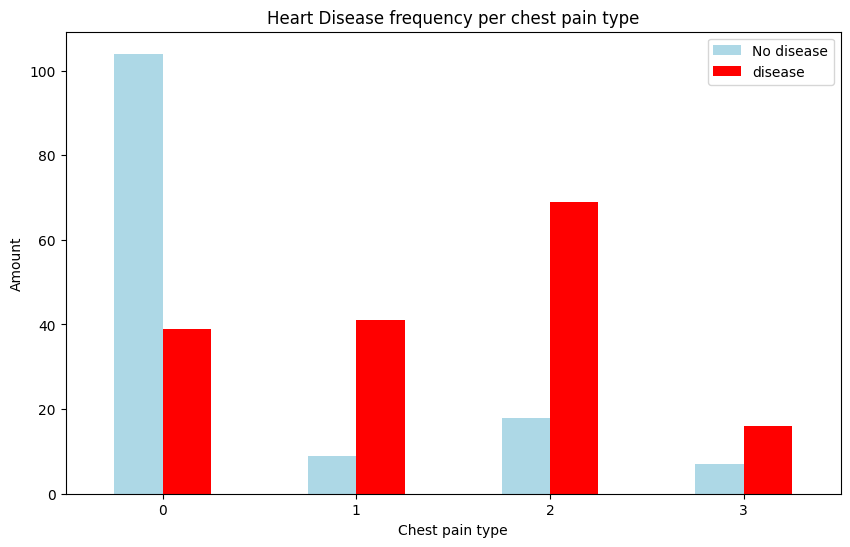

In [7]:
# check heart disease frequency per Chest pain type
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize = (10,6), color = ["lightblue","red"])
plt.title("Heart Disease frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No disease","disease"])
plt.xticks(rotation = 0);

In [8]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


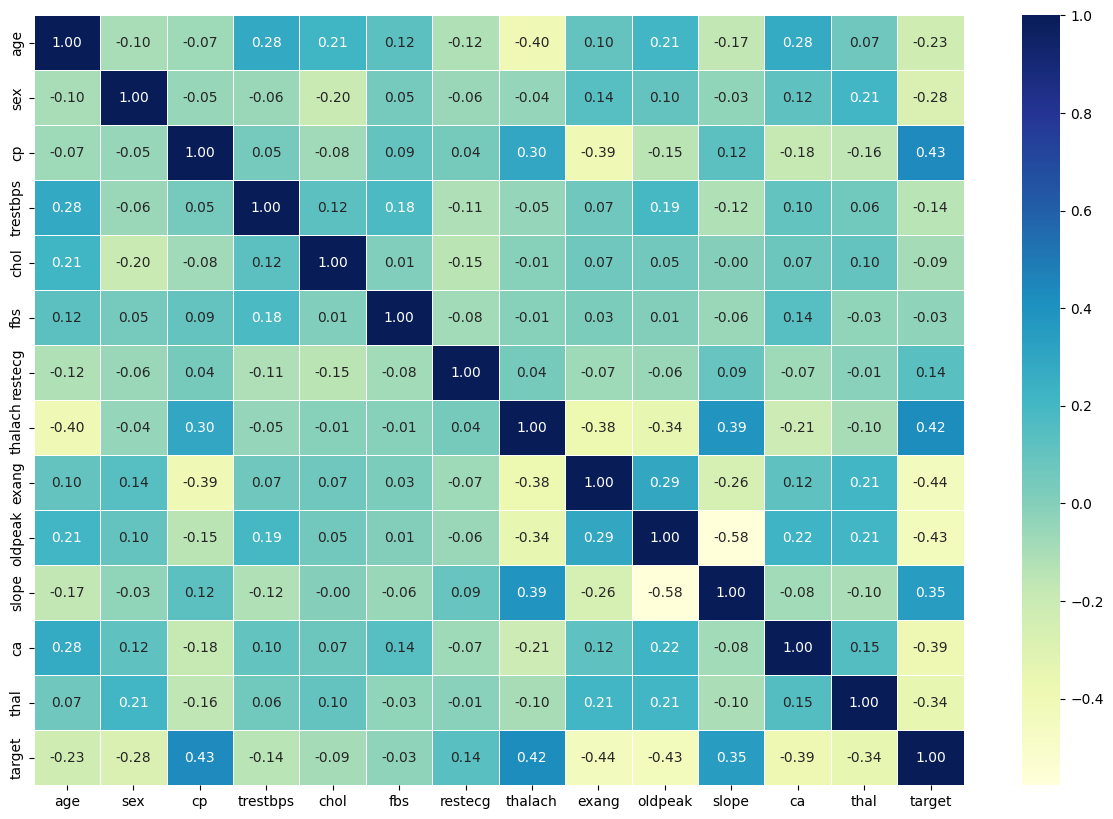

In [9]:
# making our correlation matrix visual
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot = True,linewidth = 0.5,fmt = ".2f",cmap= "YlGnBu" )

# Modelling

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
# split data into x nd y
X = df.drop("target",axis = 1)
y = df.target
#Split the data into train and test case
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [12]:
X,y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

We're going to try and use 3 models :

1. Logistic Regression
2. K-Nearest neighbour Classifier
3. Random forest Classifier

In [13]:
#using a model and training
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random forest": RandomForestClassifier()}
#create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """Fits and evaluates given machine learning models"""
    np.random.seed(42)
    # make a list to keep model score
    model_scores = {}
    #Loop through models
    for name,model in models.items():
        #fit the model to the data
        model.fit(X_train,y_train)
        #evaluate and append the score
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [14]:
model_scores = fit_and_score(models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

C:\Users\avi05\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random forest': 0.8360655737704918}

### Model comparison

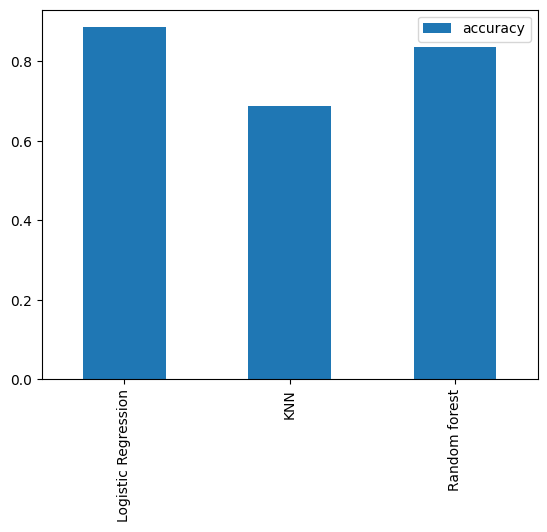

In [15]:
model_compare = pd.DataFrame(model_scores,index = ["accuracy"])
model_compare.T.plot.bar();

### Hyperparameter tuning

In [16]:
#tune KNN
train_score = []
test_score = []
# Create a list of diff values for n_neighbours
neighbors = range(1,21)

#setup KNN instance
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)

#fit the algo
    knn.fit(X_train,y_train)

    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))

In [17]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Maximum KNN score on the test data: 75.41%


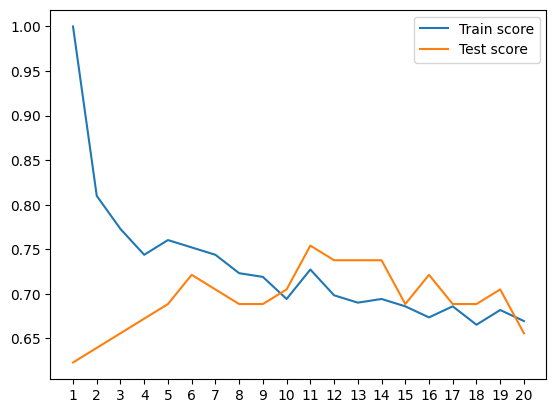

In [18]:
plt.plot(neighbors,train_score,label = "Train score")
plt.plot(neighbors,test_score,label = "Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel = ("Number of neighbors")
plt.ylabel = ("Model score")
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

### Hyperparameter tuning with RandomizedSearchCV 

In [19]:
# create a hyperparameter grid for logisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver": ["liblinear"]}
#create hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

In [20]:
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv = 5, n_iter = 20,verbose = True)

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [21]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now we've tuned LogisticRegression now its time to tune RandomForestClassifier

In [22]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions= rf_grid,cv = 5,n_iter = 20, verbose = True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [23]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [24]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random forest': 0.8360655737704918}

### Hyperparameter using GridSearchCV

In [25]:
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver": ["liblinear"]}
#create hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

In [26]:
gs_log_reg = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid, cv = 5, verbose = True)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [27]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning model other than accuracy 

In [28]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [29]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

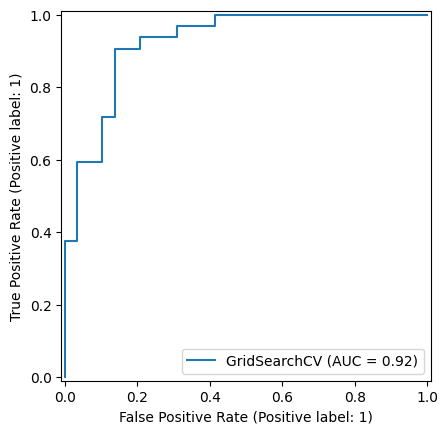

In [30]:
RocCurveDisplay.from_estimator(gs_log_reg,X_test, y_test);

In [31]:
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


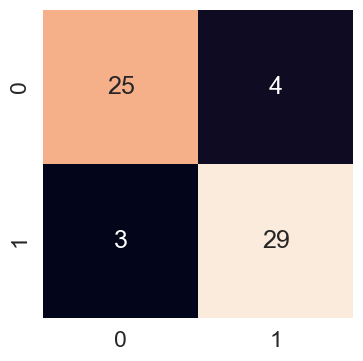

In [32]:
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test,y_preds):
    fig,ax = plt.subplots(figsize = (4,4))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot = True, cbar = False)
    plt.xlabel = ("True label")
    plt.ylabel = ("Predicted label")

plot_conf_mat(y_test,y_preds)

In [33]:
# Classification report and cross validated precision, recall and f1-score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross validation

In [34]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [35]:
clf = LogisticRegression(C = 0.23357214690901212, solver = "liblinear")

In [36]:
#cross validated accuracy
cv_acc = cross_val_score(clf,X,y,cv = 5, scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [37]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [38]:
#cross validated precision
cv_prec = cross_val_score(clf,X,y,cv = 5, scoring = "precision")
cv_prec =  np.mean(cv_prec)
cv_prec

0.8215873015873015

In [39]:
#cross validated recall
cv_recall = cross_val_score(clf,X,y,cv = 5, scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [40]:
#cross validated f1
cv_f1 = cross_val_score(clf,X,y,cv = 5, scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

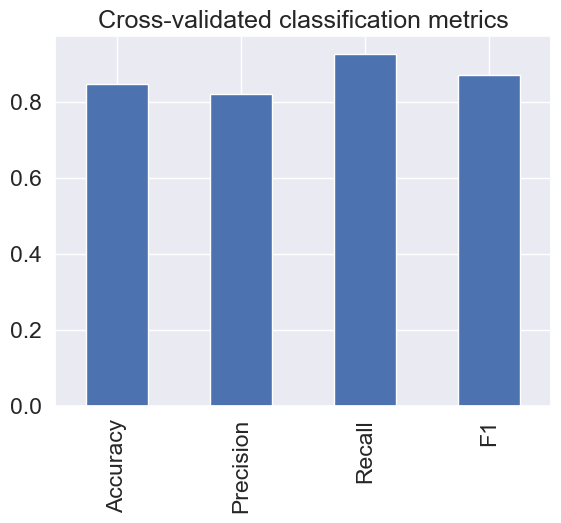

In [41]:
# visualize the cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_prec,
                           "Recall":cv_recall,
                           "F1":cv_f1},index = [0])
cv_metrics.T.plot.bar(title = "Cross-validated classification metrics",legend = False);

## Feature importance

In [42]:
clf = LogisticRegression(C = 0.23357214690901212, solver = "liblinear")
clf.fit(X_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [43]:
clf.coef_

array([[ 0.00369922, -0.90424096,  0.67472824, -0.0116134 , -0.00170364,
         0.04787687,  0.33490206,  0.02472938, -0.63120412, -0.57590985,
         0.4709516 , -0.65165345, -0.69984214]])

In [44]:
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.00369922271969309,
 'sex': -0.9042409571824147,
 'cp': 0.6747282417003583,
 'trestbps': -0.01161339887501955,
 'chol': -0.0017036434876667307,
 'fbs': 0.04787687234653053,
 'restecg': 0.3349020564037549,
 'thalach': 0.024729381484044546,
 'exang': -0.6312041160762268,
 'oldpeak': -0.575909845192967,
 'slope': 0.4709515998265588,
 'ca': -0.6516534466903441,
 'thal': -0.6998421437724929}

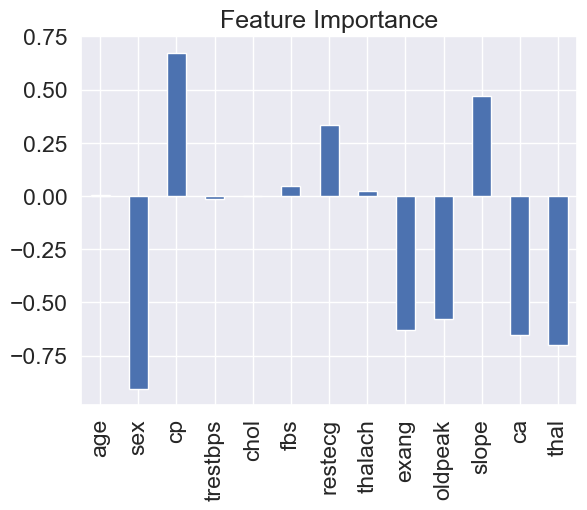

In [45]:
# visualize feature importance
feature_df = pd.DataFrame(feature_dict,index = [0])
feature_df.T.plot.bar(title = "Feature Importance",legend = False);